In [2]:
import pandas as pd
import numpy as np

In [4]:
#reading the csv file and storing in pandas dataframe:
churn_df=pd.read_csv("D:\Designing snippets\MSc Logs\CygnusInsights\data sets\churn.csv",sep=",",header=None)

In [46]:
#initial peeking:
churn_df.head()
#churn_df.describe() #describes summary of the data. basic summary statistics. 
#churn_df.dtypes #non int or float objects will  have data type as object. object also appears if a column has missing values;


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [15]:
#assigning column names:
churn_df.columns #to display names of the columns: #currently these are just numbers which don't make much sense!



Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [21]:
#read column names from a file and assign it to columns property of the churn_df:
names_file=open("D:\Designing snippets\MSc Logs\CygnusInsights\data sets\churn_names.csv",'r')
col_name1=names_file.readlines() #using the read lines function



In [50]:
col_name1[0:3] #this has \n in it as well. firstly remove that:
col_name2=list()
for c in col_name1:
    if c=='\n':
        continue
    else:
        col_name2.append(c)
col_name2 #now \n are removed. also first two lines of this list are of no use thus:
col_name2=[x for x in col_name2 if col_name2.index(x) not in [0,1,2] ]
col_name2 #now your values are like state:discrete.\n strsplit on :

col_names=[x.split(':')[0] for x in col_name2] #splitting and picking the first element out of it.

len(col_names) #its length is 20 because it doesn't has outcome colname
col_names.append('churned')
col_names

#now assign column names to your dataframe:
churn_df.columns=col_names
churn_df.head()


#done.








,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [1]:
%matplotlib inline
#import matplotlib.pyplot as plt
%pylab
plt.figure(num=1,figsize=(8,6))
#plt.plot(churn_df['account length'])
hist(churn_df['account length'])
#notes:
#you can import matplotlib.pyplot and specify matplotlib inline or simply you can use %pylab
#if you simply use %pylab, then you don't need to use . e.g. just use hist to plot a histogram




Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


NameError: name 'churn_df' is not defined

(array([  4.,   7.,   9.,  10.,  14.,  14.,  23.,   9.,   6.,   3.]),
 array([  18. ,   34.8,   51.6,   68.4,   85.2,  102. ,  118.8,  135.6,
         152.4,  169.2,  186. ]),
 <a list of 10 Patch objects>)

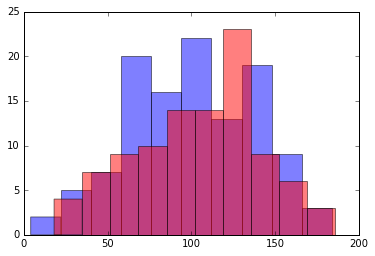

In [130]:
al_oh=churn_df.ix[churn_df.state=="OH",'account length'] #just getting account length value out of the data frame for state==OH
al_ks=churn_df.ix[churn_df.state=="KS",'account length'] #doing the same

#what gets returned is numpy array. converting to list as well:
#type(al_oh)
al_oh=list(al_oh)
al_ks=list(al_ks)
#plt.plot(range(len(al_oh)),al_oh,'b-',range(len(al_ks)),al_ks,'r--') #plotting two plots of account lengths of two states
plt.figure(1)
plt.subplot(1,1,1)
plt.hist(al_oh,alpha=0.5)
plt.hist(al_ks,alpha=0.5,color='r')
#plt.subplot(1,1,2)
#plt.

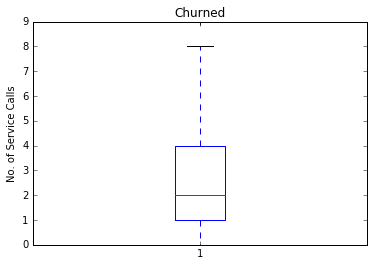

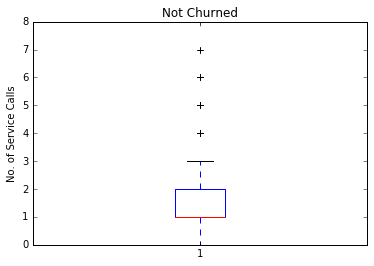

In [166]:
#comparing characteristics of those who churned and those who didn't.
#doing basic statistics like calculating average of metrics for both segments:
c_scalls=churn_df.ix[churn_df['churned']==' True.','number customer service calls'] #there are leading spaces in it. 
c_scalls
nc_scalls=churn_df.ix[churn_df['churned']==' False.','number customer service calls']
nc_scalls

#about to plot a box plot:
plt.figure(1)
#plt.subplot(2,1,1)
plt.boxplot(list(c_scalls))
plt.ylabel("No. of Service Calls")
plt.title("Churned")
#plt.subplot(2,1,2)
plt.figure(2)
plt.boxplot(list(nc_scalls))
plt.ylabel("No. of Service Calls")
plt.title("Not Churned")
#plt.box


(array([  9.02000000e+02,   1.59600000e+03,   1.00500000e+03,
          5.92000000e+02,   0.00000000e+00,   1.41000000e+02,
          3.80000000e+01,   1.20000000e+01,   6.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

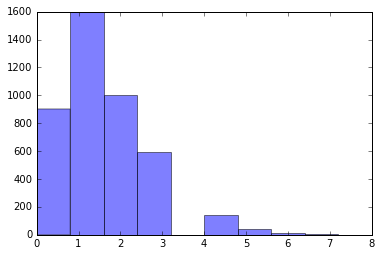

In [173]:
#plt.hist(list(c_scalls),alpha=0.5,color='r',bins=10)
#plt.figure(2)
plt.hist(list(nc_scalls),alpha=0.5,color='b',bins=10) 
#there is a bit of a discrepancy: number of nonchurned records are much greater than the churned ones)
#thus histogram isn't a good indicator.
#next:
#analyze on the dimension of states.